In [ ]:
import re

log_file = "training.txt"

# Regular expression to detect new model training
model_pattern = re.compile(r"Training (\S+)\.\.\.")

model_files = {}
current_model = None

# Read and split logs into separate files
with open(log_file, "r") as file:
    for line in file:
        model_match = model_pattern.search(line)

        if model_match:
            current_model = model_match.group(1)  # Extract model name
            model_files[current_model] = open(f"{current_model}.txt", "w")

        if current_model:
            model_files[current_model].write(line)

# Close all file handlers
for f in model_files.values():
    f.close()

print("Log file split into separate model files successfully!")


Log file split into separate model files successfully!


In [ ]:
model_files

{'deit_tiny_patch16_224': <_io.TextIOWrapper name='deit_tiny_patch16_224.txt' mode='w' encoding='utf-8'>,
 'mobilenetv3_large_100': <_io.TextIOWrapper name='mobilenetv3_large_100.txt' mode='w' encoding='utf-8'>,
 'resnet50': <_io.TextIOWrapper name='resnet50.txt' mode='w' encoding='utf-8'>,
 'efficientnet_b3': <_io.TextIOWrapper name='efficientnet_b3.txt' mode='w' encoding='utf-8'>,
 'swin_tiny_patch4_window7_224': <_io.TextIOWrapper name='swin_tiny_patch4_window7_224.txt' mode='w' encoding='utf-8'>,
 'convnext_tiny': <_io.TextIOWrapper name='convnext_tiny.txt' mode='w' encoding='utf-8'>,
 'vgg19_bn': <_io.TextIOWrapper name='vgg19_bn.txt' mode='w' encoding='utf-8'>}

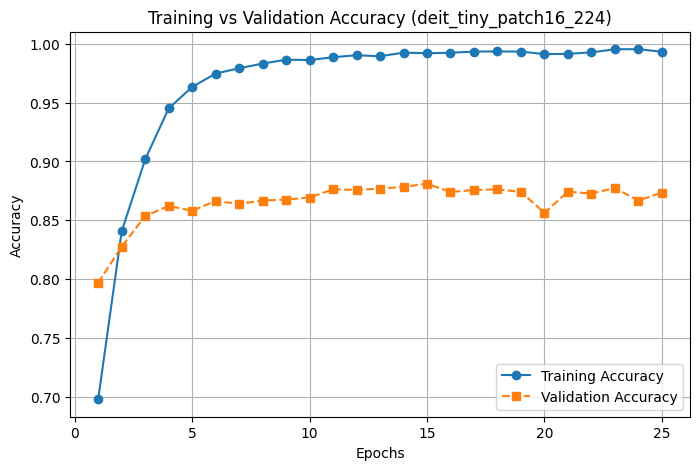

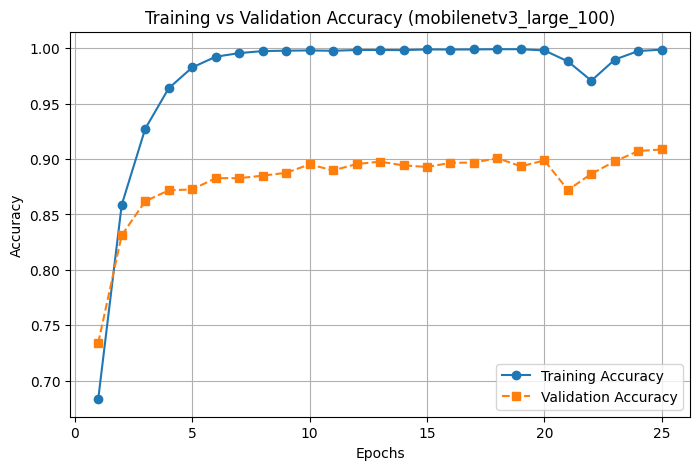

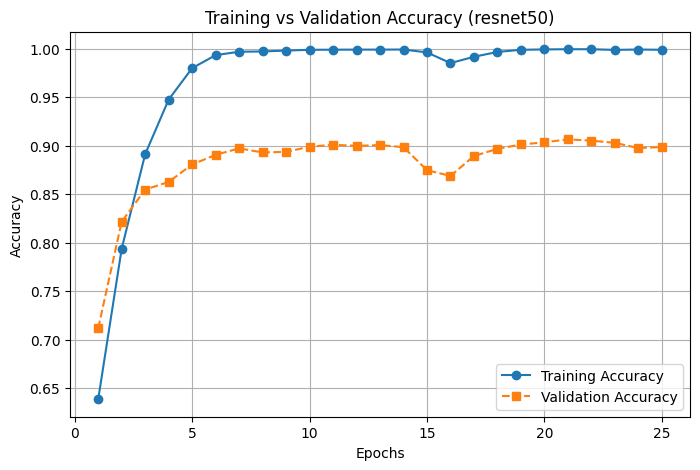

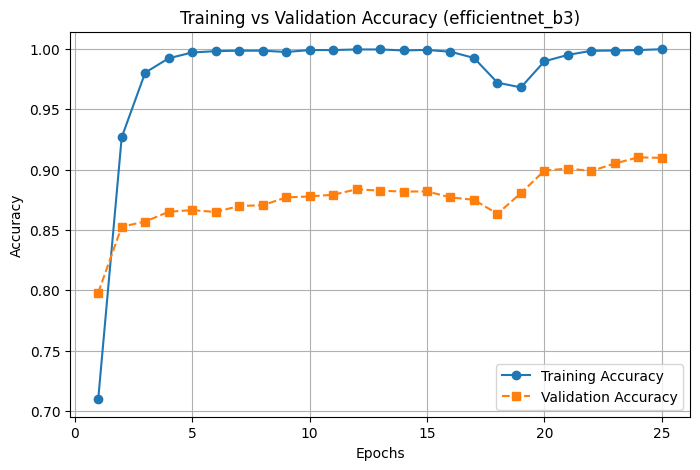

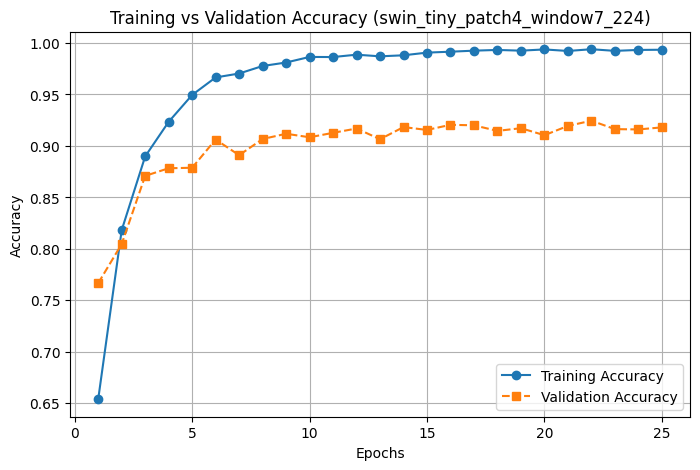

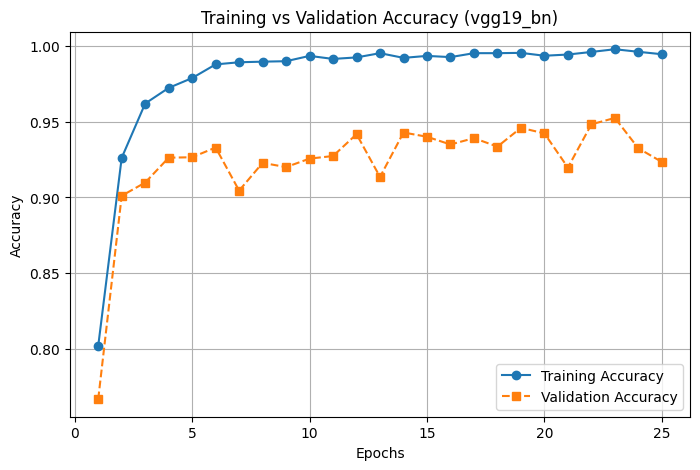

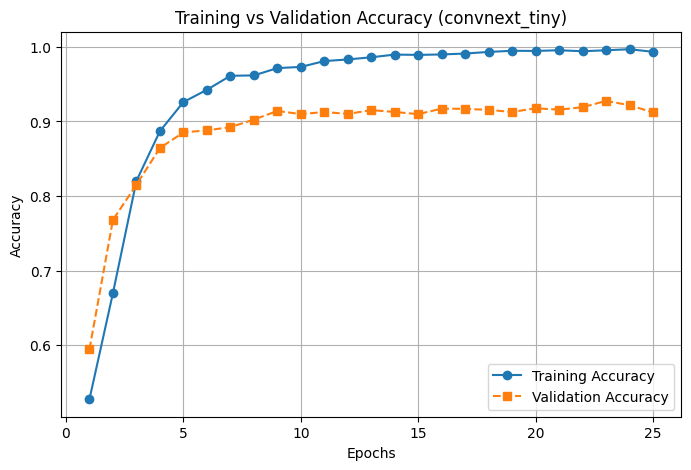

In [ ]:
import re
import matplotlib.pyplot as plt
import os

# List of model log files
model_files = ["deit_tiny_patch16_224.txt", "mobilenetv3_large_100.txt", "resnet50.txt", "efficientnet_b3.txt", "swin_tiny_patch4_window7_224.txt", "vgg19_bn.txt", "convnext_tiny.txt"]

# Regular expression to extract epoch, training accuracy, and validation accuracy
pattern = re.compile(r"Epoch (\d+)/\d+ .*? Train Acc: (\d+\.\d+) .*? Val Acc: (\d+\.\d+)")

for log_file in model_files:
    if not os.path.exists(log_file):
        print(f"File {log_file} not found. Skipping...")
        continue

    epochs = []
    train_acc = []
    val_acc = []

    # Read and extract data
    with open(log_file, "r") as file:
        for line in file:
            match = pattern.search(line)
            if match:
                epochs.append(int(match.group(1)))
                train_acc.append(float(match.group(2)))
                val_acc.append(float(match.group(3)))

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_acc, label="Training Accuracy", marker="o", linestyle="-")
    plt.plot(epochs, val_acc, label="Validation Accuracy", marker="s", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Training vs Validation Accuracy ({log_file.replace('.txt', '')})")
    plt.legend()
    plt.grid(True)
    plt.show()
